# GOOAL !?

We want to predict the **next Mbappé!**

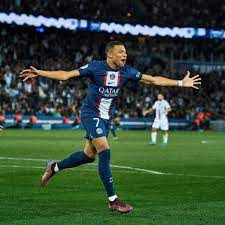

## 00. Coding Best Practices

In [1]:
# Basic Libraries
import pandas as pd
pd.set_option('display.max_columns', None) 
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Encoding
from sklearn.preprocessing import LabelEncoder

In [2]:
# Basic functions:
def data_exp(): # first exploration
    print("The dataframe shape is", data.shape, ".")
    print(" ")
    print("The dataframe columns are:")
    print(data.columns)
    print(" ")
    print("The dataframe data types are:")
    print(data.dtypes)
    return data.sample(5)

def data_clean(): # to standarize column names
    data.columns = cc = [column.lower().replace(' ', '_') for column in data] # standarizing the columns
    data.sample(0)
    
# Specific functions for this dataset:
def convert_value(value): # function to convert value to unified format for our target ['Value']
    if isinstance(value, float):
        return value
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value.endswith('M'):
        return float(value[1:-1]) * 1000000
    else:
        try:
            return float(value)
        except ValueError:
            return None

## 01 - Getting the Data

In [3]:
data = pd.read_csv('fifa21_male2.csv')
data_exp()

The dataframe shape is (17125, 107) .
 
The dataframe columns are:
Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)
 
The dataframe data types are:
ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
14600,251435,D. Carlson,22,64,Luxembourg,Karlsruher SC,64,LB,LB,https://cdn.sofifa.com/players/251/435/20_120.png,https://cdn.sofifa.com/teams/1832/light_60.png,https://cdn.sofifa.com/flags/lu.png,71,Karlsruher SC 2019 ~ 2022,"6'1""",181lbs,Left,7,"Jul 1, 2019",NaN,€575K,€3K,€1M,2019 ~ 2022,219,68,19,52,62,18.0,244,65,41.0,26,52,60,303,65,65,60.0,57,56.0,242,35,49.0,64,70,24,212,58,56.0,36.0,34.0,28,56.0,184,54,65,65.0,51,12,9,7,9,14,1455,328,3 ★,2★,Medium,Medium,1 ★,65,24,53,62,59,65,4,45+2,45+2,45+2,53+0,49+0,49+0,49+0,53+0,50+2,50+2,50+2,56+2,53+2,53+2,53+2,56+2,62+2,59+2,59+2,59+2,62+2,62+2,60+2,60+2,60+2,62+2,16+2,Male
909,164169,Filipe Luís,32,85,Brazil,Atlético Madrid,83,LWB,LB,https://cdn.sofifa.com/players/164/169/19_120.png,https://cdn.sofifa.com/teams/240/light_60.png,https://cdn.sofifa.com/flags/br.png,85,Atlético Madrid 2015 ~ 2019,"6'0""",163lbs,Left,0,"Jul 28, 2015",NaN,€21.5M,€80K,€44.1M,2015 ~ 2019,353,86,59,72,80,56.0,386,77,74.0,75,77,83,372,76,75,74.0,85,62.0,362,71,69.0,89,73,60,371,81,84.0,71.0,70.0,65,88.0,248,78,84,86.0,49,11,15,9,9,5,2141,452,3 ★,3★,High,Medium,3 ★,75,62,78,78,81,78,20,72+2,72+2,72+2,76+0,74+0,74+0,74+0,76+0,75+2,75+2,75+2,78+2,78+2,78+2,78+2,78+2,83+2,81+2,81+2,81+2,83+2,83+2,80+2,80+2,80+2,83+2,18+2,Male
8510,228761,O. Estupiñán,23,69,Colombia,Vitória Guimarães,71,ST,ST,https://cdn.sofifa.com/players/228/761/20_120.png,https://cdn.sofifa.com/teams/1887/light_60.png,https://cdn.sofifa.com/flags/co.png,76,Vitória Guimarães 2017 ~ 2021,"6'0""",163lbs,Left,7,"Jul 1, 2017",NaN,€1.5M,€5K,€3.5M,2017 ~ 2021,303,40,68,74,56,65.0,303,69,56.0,60,47,71,338,69,71,65.0,63,70.0,358,77,90.0,47,74,70,231,42,18.0,68.0,40.0,63,65.0,64,23,21,20.0,51,11,11,14,9,6,1648,345,2 ★,3★,Medium,Medium,1 ★,70,70,48,69,26,62,19,69+2,69+2,69+2,63+0,66+0,66+0,66+0,63+0,62+2,62+2,62+2,60+2,54+2,54+2,54+2,60+2,43+2,42+2,42+2,42+2,43+2,42+2,42+2,42+2,42+2,42+2,15+2,Male
15584,254215,J. Vivar,21,68,Ecuador,SD Aucas,70,ST,RM RW,https://cdn.sofifa.com/players/254/215/20_120.png,https://cdn.sofifa.com/teams/110987/light_60.png,https://cdn.sofifa.com/flags/ec.png,77,SD Aucas 2018 ~ 2021,"5'5""",146lbs,Left,9,"Jan 16, 2018",NaN,€1.4M,€500,€3.3M,2018 ~ 2021,308,59,74,58,57,60.0,271,73,44.0,35,51,68,364,75,76,72.0,68,73.0,336,66,65.0,75,72,58,263,52,16.0,69.0,60.0,66,66.0,86,49,19,18.0,43,5,11,12,8,7,1671,369,3 ★,3★,Medium,Medium,1 ★,76,68,55,71,31,68,4,68+2,68+2,68+2,68+0,68+0,68+0,68+0,68+0,66+2,66+2,66+2,67+2,58+2,58+2,58+2,67+2,50+2,47+2,47+2,47+2,50+2,47+2,43+2,43+2,43+2,47+2,15+2,Male
7257,222601,E. Osam,21,55,Republic of Ireland,UCD AFC,56,LB,LB,https://cdn.sofifa.com/players/222/601/20_120.png,https://cdn.sofifa.com/teams/111132/light_60.png,https://cdn.sofifa.com/flags/ie.png,66,UCD AFC 2017 ~ 2024,"5'10""",154lbs,Left,11,"Feb 6, 2017",NaN,€130K,€500,€228K,2017 ~ 2024,209,50,39,39,51,30.0,213,51,38.0,30,45,49,323,77,71,58.0,46,71.0,234,37,60.0,68,42,27,229,47,50.0,54.0,41.0,37,49.0,152,49,52,51.0,61,14,15,13,7,12,1421,307,2 ★,2★,Medium,Medium,1 ★,74,36,46,52,49,50,3,46+2,46+2,46+2,51+0,49+0,49+0,49+0,51+0,49+2,49+2,49+2,53+2,48+2,48+2,48+2,53+2,54+2,50+2,50+2,50+2,54+2,54+2,49+2,49+2,49+2,54+2,16+2,Male


This dataset contains **one-year** 17.125 player information from 107 different columns.

Our **goal** is to predict who will be **the next Mbappé**, so after reading the dataset [Documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) we decide to proceed with the following **strategy**:

We will select all column 

    *  `We will create a new dataframe to work-with for that.`

* From all numericals related to the player potential, we will get rid of some columns like:
    * `['attacking', 'crossing', 'finishing', 'heading_accuracy','short_passing']` (see code bellow) 
    * Because, for example..
        
       *`"attacking"` = sum ("crossing","finishing","heading_accuracy","short_passing","volleys")
       `"skill"` = sum("dribbling","curve","fk_accuracy","long_passing","ball_control")
       `"base_stats"` = sum ("pac","sho","pas","dri","def","phy")`

* Since the idea is to find some promising talents through `EDA` to predict their future `Score`!
    * The target for our dataset will be `OVA` (overall score) of a player.

* `Value`, `Wage`, and `Release Clause` are interesting columns to work-with.
    * But they contain symbols like € and K so they have to be converted to numericals.
* We will also use features such as `height`, `weight`, etc., 
    * We will convert them to the metrical system and get rid of any quotation symbol or lbs.

## 02 - Cleaning the Data

In [4]:
data_clean() # to standarize the column names
data = data.rename(columns={"team_&_contract": "team&contract"})

In [5]:
# rename columns with their corresponding meanings
data = data.rename(columns={"ova":"overall_scores",
                        "bov":"best_overall",
                        "pot":"potential_scores",
                        "w/f":"weak_foot",
                        "ir":"international_reputation", 
                        "sm":"skilled_moves",
                        "a/w":"attacking_work_rate",
                        "d/w":"defensive_work_rate",})

In [6]:
data.sample(0) # let's check how it looks

,id,name,age,overall_scores,nationality,club,best_overall,bp,position,player_photo,club_logo,flag_photo,potential_scores,team&contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skilled_moves,attacking_work_rate,defensive_work_rate,international_reputation,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender


In [7]:
data_copy = data.copy() # as best practices, now we make a safe copy of our data

In [8]:
# Check if "id" has duplicated values to dealwith
print("There are duplicate values in 'id'.") if data_copy['id'].duplicated().any() else print("All values in 'id' are unique.")

All values in 'id' are unique.


In [9]:
# data_copy = data_copy.set_index('id') # id is unique, so we passed it as the index
# data_copy.sample(0)

### Dealing with Null values

In [10]:
# Check for empty cells in the entire DataFrame
null_cols = data_copy.isnull().sum()
null_cols = null_cols[null_cols > 0]
null_cols

club                      23
position                 413
club_logo                 23
joined                    58
loan_date_end          16215
volleys                   58
curve                     58
agility                   58
balance                   58
jumping                   58
interceptions              7
positioning                7
vision                    58
composure                423
sliding_tackle            58
attacking_work_rate       89
defensive_work_rate       89
dtype: int64

In [11]:
# We get rid of loan_date since it has way too many NaN values
data_copy = data_copy.drop(columns=["loan_date_end"])

In [12]:
# We will also remove 423 rows from value. 423 rows =  2,61 % from the total dataset, and It'll improve the model.
data_copy = data_copy.dropna(subset=['value'])
data_copy.shape

(17125, 106)

In [13]:
# Now, we check the data from columns like value, wage, and rel_clause
data_copy['value'].head(3)

0    €625K
1    €600K
2    €1.1M
Name: value, dtype: object

In [14]:
data_copy['wage'].head(3)

0     €7K
1     €7K
2    €15K
Name: wage, dtype: object

In [15]:
data_copy['release_clause'].head(3)

0       €0
1    €1.1M
2       €0
Name: release_clause, dtype: object

There are many symbols `M`, `K`, `€` located at index[0] and [-1] so we will use an specific function (`convert_value`) to get rid of the symbols, and to properly convert the values to numericals for each case.

In [16]:
data_copy['value'] = data_copy['value'].apply(convert_value) # Applying the function
data_copy['value'].head(3)

0     625000.0
1     600000.0
2    1100000.0
Name: value, dtype: float64

In [17]:
data_copy['wage'] = data_copy['wage'].apply(convert_value)
data_copy['wage'].head(3)

0     7000.0
1     7000.0
2    15000.0
Name: wage, dtype: float64

In [18]:
data_copy['rel_clause'] = data_copy['release_clause'].apply(convert_value)
data_copy['rel_clause'].head(3)

0          NaN
1    1100000.0
2          NaN
Name: rel_clause, dtype: float64

At this point we realised we created some `NaN` during this processs from previous `€0`.
With futher exploration, we finally got rid of this column.

In [19]:
data_copy.shape

(17125, 107)

* After a first data cleaning we dropped one column, from 107 features to 106.
* We will reduce that number, since we haven't dropped categoricals yet (social media information, among others).
* Firstly, some columns considered as **categoricals** are actually **numericals**, e.g: `height`, `weight`, etc. We will proceed to encode them:

### Encoding

In [20]:
# Convert height data from feet and inches to centimeters
data_copy['h_cm'] = data_copy['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1].replace('"', ''))*2.54)
data_copy['h_cm'].sample(3)

10917    172.72
14505    185.42
7376     182.88
Name: h_cm, dtype: float64

In [21]:
# Convert weight data from pounds to kilograms
data_copy['w_kg'] = data_copy['weight'].apply(lambda x: int(x[:-3]) / 2.2046)
data_copy['w_kg'].sample(3)

8920     69.853942
14782    59.874807
5582     77.111494
Name: w_kg, dtype: float64

In [22]:
# Apply lambda function to 'weak_foot' column
data_copy['weak_foot_ecd'] = data_copy['weak_foot'].apply(lambda x: int(x[0]))
data_copy['weak_foot_ecd'].sample(3)

15907    2
16463    3
7583     2
Name: weak_foot_ecd, dtype: int64

In [23]:
# Apply lambda function to 'skilled_moves' column
data_copy['skilled_moves_ecd'] = data_copy['skilled_moves'].apply(lambda x: int(x[0]))
data_copy['skilled_moves_ecd'].sample(3)

10421    2
13204    4
2504     2
Name: skilled_moves_ecd, dtype: int64

In [24]:
# Apply lambda function to 'international_reputation' column
data_copy['international_reputation_ecd'] = data_copy['international_reputation'].apply(lambda x: int(x[0]))
data_copy['international_reputation_ecd'].sample(3)

1602    1
5803    1
5013    1
Name: international_reputation_ecd, dtype: int64

### Further Encoding

In [25]:
# Initialize the LabelEncoder object
le = LabelEncoder()

# Fit and transform the data frame column
data_copy['attacking_work_rate_ecd'] = le.fit_transform(data_copy['attacking_work_rate'])
data_copy['defensive_work_rate_ecd'] = le.fit_transform(data_copy['defensive_work_rate'])

In [26]:
# Modify cells with 'K' character, leave others unchanged, turn it to integer
data_copy['hits'] = data_copy['hits'].apply(lambda x: float(x.replace('K','')) * 1000 if isinstance(x, str) and 'K' in x else x).astype(int)

### Selecting numericals

In [27]:
# Create a new dataframe with only the numerical columns using select_dtypes
X_N = data_copy.select_dtypes(np.number).apply(lambda x: round(x,2)).fillna(0) # we also deal with NaN values
X_N.head(3)

,id,age,overall_scores,best_overall,potential_scores,growth,value,wage,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,hits,rel_clause,h_cm,w_kg,weak_foot_ecd,skilled_moves_ecd,international_reputation_ecd,attacking_work_rate_ecd,defensive_work_rate_ecd
0,2,33,69,71,69,0,625000.0,7000.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,0.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,71,59,70,71,68,69,4,0.0,182.88,82.10,3,2,2,2,0
1,16,37,71,70,71,0,600000.0,7000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63,4,1100000.0,177.80,64.86,4,3,1,2,2
2,27,33,71,71,71,0,1100000.0,15000.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,0.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,45,68,76,77,36,52,11,0.0,175.26,73.03,4,4,2,2,1


In [28]:
data_headers = list(X_N.columns.values) # to get and check all column names
print("The Column Headers are :", data_headers) 

The Column Headers are : ['id', 'age', 'overall_scores', 'best_overall', 'potential_scores', 'growth', 'value', 'wage', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'rel_clause', 'h_cm', 'w_kg', 'weak_foot_ecd', 'skilled_moves_ecd', 'international_reputation_ecd', 'attacking_work_rate_ecd', 'defensive_work_rate_ecd']


* **"attacking"** = sum ("crossing","finishing","heading_accuracy","short_passing","volleys")
* **"skill"** = sum ("dribbling","curve","fk_accuracy","long_passing","ball_control")
* **"movement"** = sum ("acceleration","sprint_speed","agility","reactions","balance")
* **"power"** = sum ("shot_power","jumping","stamina","strength","long_shots")
* **"mentality"** = sum("aggression","interceptions","positioning","vision","penalties","composure")
* **"defending"** = sum ("marking","standing_tackle","sliding_tackle")
* **"goalkeeping"** = sum ("gk_diving","gk_handling","gk_kicking","gk_positioning","gk_reflexes")
* **"base_stats"** = sum ("pac","sho","pas","dri","def","phy")
* **"total_stats"** = sum("attacking","skill","movement","power","mentality",("defending","goalkeeping")

* To make it simple to work with our model, we will get rid of many columns since they already summerized in: `"attacking"`, `"skill"`, `"movement"`, "power", `"mentality"`, `"defending"`, `"goalkeeping"`, `"base_stats"` and `"total_stats"`

In [29]:
# We simply move our target Value to the right, for readibility
X_N = X_N[['age', 'best_overall', 'potential_scores', 'value', 'wage', 
           'attacking', 'skill', 'movement', 'power', 'mentality', 'defending',
           'goalkeeping', 'total_stats', 'base_stats', 'hits', 'h_cm', 'w_kg', 
           'weak_foot_ecd', 'skilled_moves_ecd', 'international_reputation_ecd',
           'attacking_work_rate_ecd', 'defensive_work_rate_ecd', 'overall_scores']]
X_N.shape

(17125, 23)

* **Now**, we got a cleaned dataset with `17.125` numerical player information in `23` distinct features.

In [30]:
X_N.sample(3)

,age,best_overall,potential_scores,value,wage,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,hits,h_cm,w_kg,weak_foot_ecd,skilled_moves_ecd,international_reputation_ecd,attacking_work_rate_ecd,defensive_work_rate_ecd,overall_scores
4622,26,65,65,0.0,0.0,293,296,389,259,211,73,47,1568,336,6,170.18,59.87,3,3,1,2,1,65
8310,23,65,66,275000.0,3000.0,295,293,345,269,293,155,61,1711,365,8,177.80,71.21,3,3,1,2,2,60
7932,22,75,81,6000000.0,20000.0,336,311,383,364,277,100,63,1834,399,129,182.88,69.85,3,3,1,2,2,73


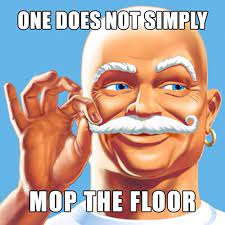

## 03 - Exploratory Data Analysis

In [31]:
X_N.describe() # basic statistics for all numerical values

,age,best_overall,potential_scores,value,wage,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,hits,h_cm,w_kg,weak_foot_ecd,skilled_moves_ecd,international_reputation_ecd,attacking_work_rate_ecd,defensive_work_rate_ecd,overall_scores
count,17125.000000,17125.000000,17125.000000,1.712500e+04,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,25.272934,67.900204,72.489810,2.567377e+06,10436.963504,258.537752,266.607591,322.693664,302.414774,261.922803,141.469898,77.609693,1631.256175,361.372146,36.369285,181.222956,75.141428,2.985927,2.452496,1.152234,1.354978,1.548088,66.965022
std,4.942665,6.637538,5.769949,5.372622e+06,21191.481943,72.255687,76.809344,54.933593,49.380576,62.913935,61.595180,81.136603,260.357024,40.252290,166.898102,6.886553,7.175338,0.672551,0.781285,0.461311,0.916545,0.781324,6.864329
min,16.000000,42.000000,47.000000,0.000000e+00,0.000000,33.000000,43.000000,113.000000,128.000000,50.000000,17.000000,5.000000,731.000000,228.000000,3.000000,154.940000,49.900000,1.000000,1.000000,1.000000,0.000000,0.000000,38.000000
25%,21.000000,64.000000,69.000000,3.750000e+05,1000.000000,232.000000,232.000000,294.000000,272.000000,235.000000,84.000000,48.000000,1492.000000,333.000000,4.000000,175.260000,69.850000,3.000000,2.000000,1.000000,0.000000,1.000000,62.000000
50%,25.000000,68.000000,72.000000,8.000000e+05,3000.000000,271.000000,279.000000,331.000000,308.000000,269.000000,158.000000,53.000000,1659.000000,362.000000,7.000000,180.340000,74.840000,3.000000,2.000000,1.000000,2.000000,2.000000,67.000000
75%,29.000000,72.000000,76.000000,2.400000e+06,11000.000000,306.000000,319.000000,360.000000,339.000000,304.000000,194.000000,59.000000,1812.000000,390.000000,18.000000,185.420000,79.830000,3.000000,3.000000,1.000000,2.000000,2.000000,72.000000
max,53.000000,93.000000,95.000000,1.055000e+08,560000.000000,437.000000,470.000000,464.000000,444.000000,421.000000,272.000000,440.000000,2316.000000,498.000000,9200.000000,205.740000,110.220000,5.000000,5.000000,5.000000,3.000000,3.000000,93.000000


In [32]:
# Looking at Most Valuable Player with rating >80
mvps = data_copy[(data_copy['overall_scores'] > 80)]

# Sort the MVPs
mvps_sorted = mvps.sort_values('value', ascending=False)
mvps_sorted.head(5)

,id,name,age,overall_scores,nationality,club,best_overall,bp,position,player_photo,club_logo,flag_photo,potential_scores,team&contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skilled_moves,attacking_work_rate,defensive_work_rate,international_reputation,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,rel_clause,h_cm,w_kg,weak_foot_ecd,skilled_moves_ecd,international_reputation_ecd,attacking_work_rate_ecd,defensive_work_rate_ecd
9331,231747,K. Mbappé,21,90,France,Paris Saint-Germain,91,ST,ST LW RW,https://cdn.sofifa.com/players/231/747/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/fr.png,95,Paris Saint-Germain 2018 ~ 2022,"5'10""",161lbs,Right,5,"Jul 1, 2018",105500000.0,160000.0,€203.1M,2018 ~ 2022,408,78,91,73,83,83.0,394,92,79.0,63,70,90,458,96,96,92.0,92,82.0,404,86,77.0,86,76,79,341,62,38.0,91.0,80.0,70,84.0,100,34,34,32.0,42,13,5,7,11,6,2147,466,4 ★,5★,High,Low,3 ★,96,86,78,91,39,76,1200,88+3,88+3,88+3,89+0,89+0,89+0,89+0,89+0,87+3,87+3,87+3,87+3,79+3,79+3,79+3,87+3,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3,18+3,Male,203100000.0,177.80,73.029121,4,5,3,0,1
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,LW CAM,https://cdn.sofifa.com/players/190/871/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/br.png,91,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",90000000.0,270000.0,€166.5M,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,Male,166500000.0,175.26,68.039554,5,5,5,0,2
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,CAM CM,https://cdn.sofifa.com/players/192/985/20_120.png,https://cdn.sofifa.com/teams/10/light_60.png,https://cdn.sofifa.com/flags/be.png,91,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",87000000.0,370000.0,€161M,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,Male,161000000.0,180.34,69.853942,5,4,4,0,0
2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,ST,https://cdn.sofifa.com/players/188/545/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/pl.png,91,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",80000000.0,240000.0,€132M,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,Male,132000000.0,182.88,79.833076,4,4,4,0,2
5109,209331,M. Salah,28,90,Egypt,Liverpool,90,RW,RW,https://cdn.sofifa.com/players/209/331/20_120.png,https://cdn.sofifa.com/teams/9/light_60.png,https://cdn.sofifa.com/flags/eg.png,90,Liverpool 2017 ~ 2023,"5'9""",157lbs,Left,0,"Jul 1

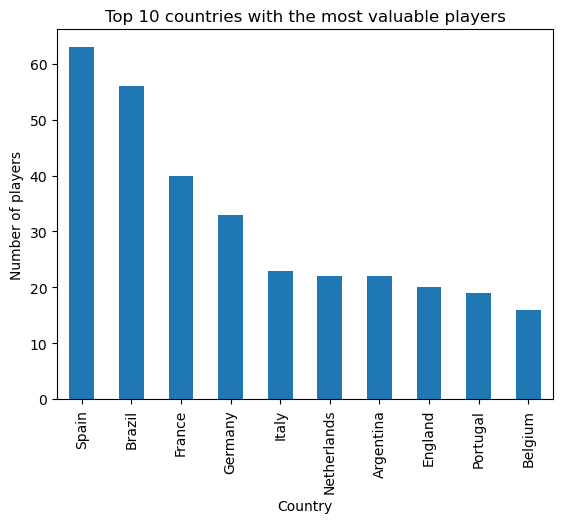

In [33]:
# Group the data by country and count the number of players in each country
mvps_by_country = mvps.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
mvps_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most valuable players')

# Display the chart
plt.show()

In [35]:
# Looking at promising talents
data_copy['pot_minus_ova'] = data_copy['potential_scores'] - data_copy['overall_scores'] 

# Create a new DataFrame that contains only the rows with "difference" > 10 and age < 21
talents = data_copy[(data_copy['pot_minus_ova'] > 10) & (data_copy['age'] < 21)]
talents_sorted = talents.sort_values('pot_minus_ova', ascending=False)
talents_sorted.head(3)

,id,name,age,overall_scores,nationality,club,best_overall,bp,position,player_photo,club_logo,flag_photo,potential_scores,team&contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skilled_moves,attacking_work_rate,defensive_work_rate,international_reputation,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,rel_clause,h_cm,w_kg,weak_foot_ecd,skilled_moves_ecd,international_reputation_ecd,attacking_work_rate_ecd,defensive_work_rate_ecd,pot_minus_ova
16660,257793,R. Richards,16,54,England,West Bromwich Albion,55,LM,LM CAM,https://cdn.sofifa.com/players/257/793/20_120.png,https://cdn.sofifa.com/teams/109/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,80,West Bromwich Albion 2020 ~ 2023,"5'10""",150lbs,Left,26,"Aug 4, 2020",150000.0,1000.0,€450K,2020 ~ 2023,220,52,40,37,50,41.0,248,59,47.0,41,43,58,313,72,64,62.0,43,72.0,251,53,51.0,54,45,48,194,33,16.0,39.0,55.0,51,48.0,84,22,29,33.0,43,10,8,8,8,9,1353,293,3 ★,2★,Medium,Medium,1 ★,68,45,50,59,26,45,83,48+2,48+2,48+2,53+0,51+0,51+0,51+0,53+0,52+2,52+2,52+2,53+2,47+2,47+2,47+2,53+2,43+2,38+2,38+2,38+2,43+2,41+2,34+2,34+2,34+2,41+2,12+2,Male,450000.0,177.80,68.039554,3,2,1,2,2,26
17112,259074,A. Hajdari,17,53,Switzerland,FC Basel 1893,55,CB,CB,https://cdn.sofifa.com/players/259/074/20_120.png,https://cdn.sofifa.com/teams/896/light_60.png,https://cdn.sofifa.com/flags/ch.png,79,FC Basel 1893 2020 ~ 2024,"6'2""",176lbs,Left,26,"Sep 14, 2020",120000.0,NaN,€300K,2020 ~ 2024,161,31,17,53,32,28.0,134,22,30.0,29,25,28,262,58,61,45.0,48,50.0,252,38,66.0,56,68,24,195,51,53.0,28.0,27.0,36,39.0,157,47,58,52.0,46,12,9,9,11,5,1207,259,3 ★,2★,Low,Medium,1 ★,60,25,30,29,53,62,37,36+2,36+2,36+2,32+0,32+0,32+0,32+0,32+0,31+2,31+2,31+2,34+2,33+2,33+2,33+2,34+2,45+2,44+2,44+2,44+2,45+2,48+2,53+2,53+2,53+2,48+2,14+2,Male,300000.0,187.96,79.833076,3,2,1,1,2,26
16812,258315,B. Arrey-Mbi,17,60,Germany,Bayern München II,62,CB,CB LB,https://cdn.sofifa.com/players/258/315/20_120.png,https://cdn.sofifa.com/teams/110679/light_60.png,https://cdn.sofifa.com/flags/de.png,86,Bayern München II 2020 ~ 2022,"6'2""",168lbs,Left,26,"Jul 1, 2020",425000.0,NaN,€1M,2020 ~ 2022,204,34,25,59,56,30.0,207,49,31.0,29,44,54,324,66,70,68.0,52,68.0,273,38,78.0,62,71,24,228,63,53.0,35.0,44.0,33,56.0,180,55,64,61.0,50,13,9,8,12,8,1466,322,3 ★,2★,Medium,Medium,1 ★,68,29,45,54,58,68,720,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,48+2,48+2,48+2,49+2,49+2,49+2,49+2,49+2,55+2,56+2,56+2,56+2,55+2,57+2,60+2,60+2,60+2,57+2,15+2,Male,1000000.0,187.96,76.204300,3,2,1,2,2,26


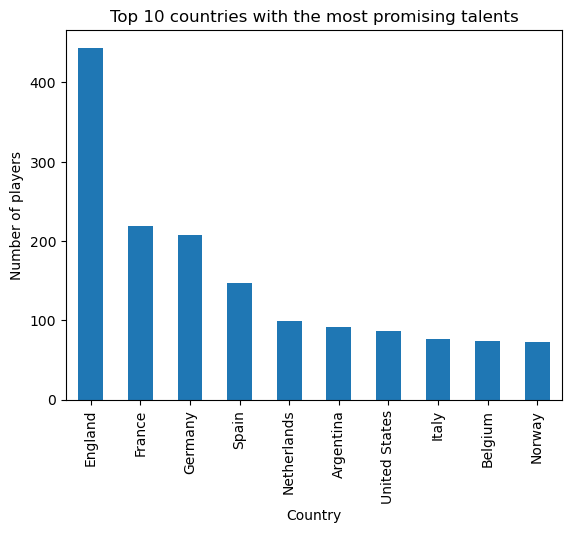

In [36]:
# Group the data by country and count the number of players in each country
talents_by_country = talents.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
talents_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most promising talents')

# Display the chart
plt.show()

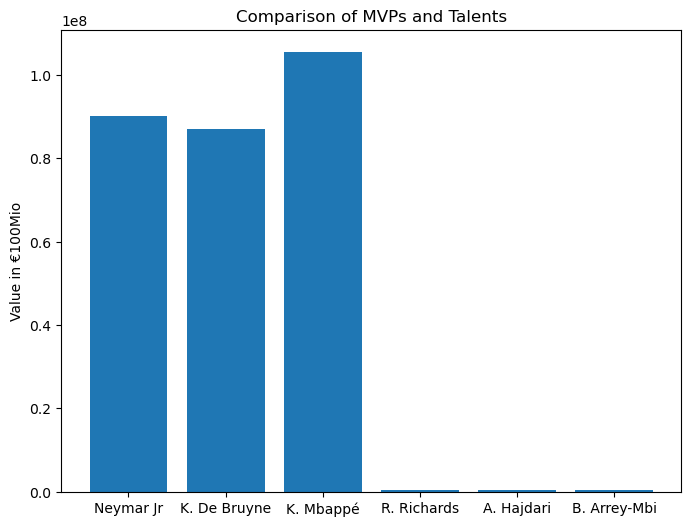

In [37]:
# create a dataframe with 'name' and 'value' columns
df = pd.DataFrame(data_copy, columns=['name', 'value'])

# select the rows for the six specific players you want to plot
players = ['K. Mbappé', 'Neymar Jr', 'K. De Bruyne', 'R. Richards', 'A. Hajdari','B. Arrey-Mbi']
df_players = df[df['name'].isin(players)]

# create a bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(df_players['name'], df_players['value'])
plt.ylabel('Value in €100Mio')
plt.title('Comparison of MVPs and Talents')

# show the chart
plt.show()

## 04 - Processing Data

### Dealing with multicollinearity

In [38]:
# Correlation Matrix
X_N_corr = round(X_N.corr(),2)
X_N_corr

,age,best_overall,potential_scores,value,wage,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,hits,h_cm,w_kg,weak_foot_ecd,skilled_moves_ecd,international_reputation_ecd,attacking_work_rate_ecd,defensive_work_rate_ecd,overall_scores
age,1.00,0.46,-0.24,0.10,0.20,0.18,0.17,-0.06,0.31,0.27,0.11,0.13,0.28,0.41,-0.08,0.09,0.26,0.08,0.07,0.40,-0.03,-0.13,0.52
best_overall,0.46,1.00,0.63,0.64,0.60,0.46,0.47,0.34,0.57,0.52,0.27,-0.01,0.64,0.83,0.25,0.02,0.13,0.21,0.37,0.46,-0.17,-0.16,0.99
potential_scores,-0.24,0.63,1.00,0.56,0.46,0.23,0.27,0.26,0.22,0.24,0.14,-0.01,0.33,0.47,0.35,-0.02,-0.04,0.14,0.24,0.29,-0.11,-0.04,0.59
value,0.10,0.64,0.56,1.00,0.82,0.29,0.30,0.26,0.33,0.31,0.13,0.00,0.39,0.53,0.40,-0.00,0.04,0.15,0.28,0.46,-0.14,-0.10,0.63
wage,0.20,0.60,0.46,0.82,1.00,0.29,0.30,0.21,0.32,0.32,0.15,-0.01,0.38,0.48,0.30,0.02,0.07,0.14,0.25,0.54,-0.11,-0.11,0.60
attacking,0.18,0.46,0.23,0.29,0.29,1.00,0.93,0.69,0.82,0.89,0.31,-0.77,0.90,0.43,0.13,-0.35,-0.26,0.36,0.77,0.24,-0.33,-0.18,0.43
skill,0.17,0.47,0.27,0.30,0.30,0.93,1.00,0.73,0.75,0.88,0.37,-0.71,0.93,0.50,0.14,-0.46,-0.36,0.36,0.79,0.23,-0.31,-0.16,0.44
movement,-0.06,0.34,0.26,0.26,0.21,0.69,0.73,1.00,0.56,0.61,0.17,-0.56,0.74,0.45,0.15,-0.63,-0.54,0.28,0.70,0.04,-0.37,-0.09,0.30
power,0.31,0.57,0.22,0.33,0.32,0.82,0.75,0.56,1.00,0.82,0.36,-0.57,0.87,0.58,0.13,-0.13,0.00,0.29,0.58,0.22,-0.30,-0.25,0.55
mentality,0.27,0.52,0.24,0.31,0.32,0.89,0.88,0.61,0.82,1.00,0.59,-0.73,0.95,0.52,0.12,-0.30,-0.20,0.29,0.66,0.27,-0.28,-0.25,0.50


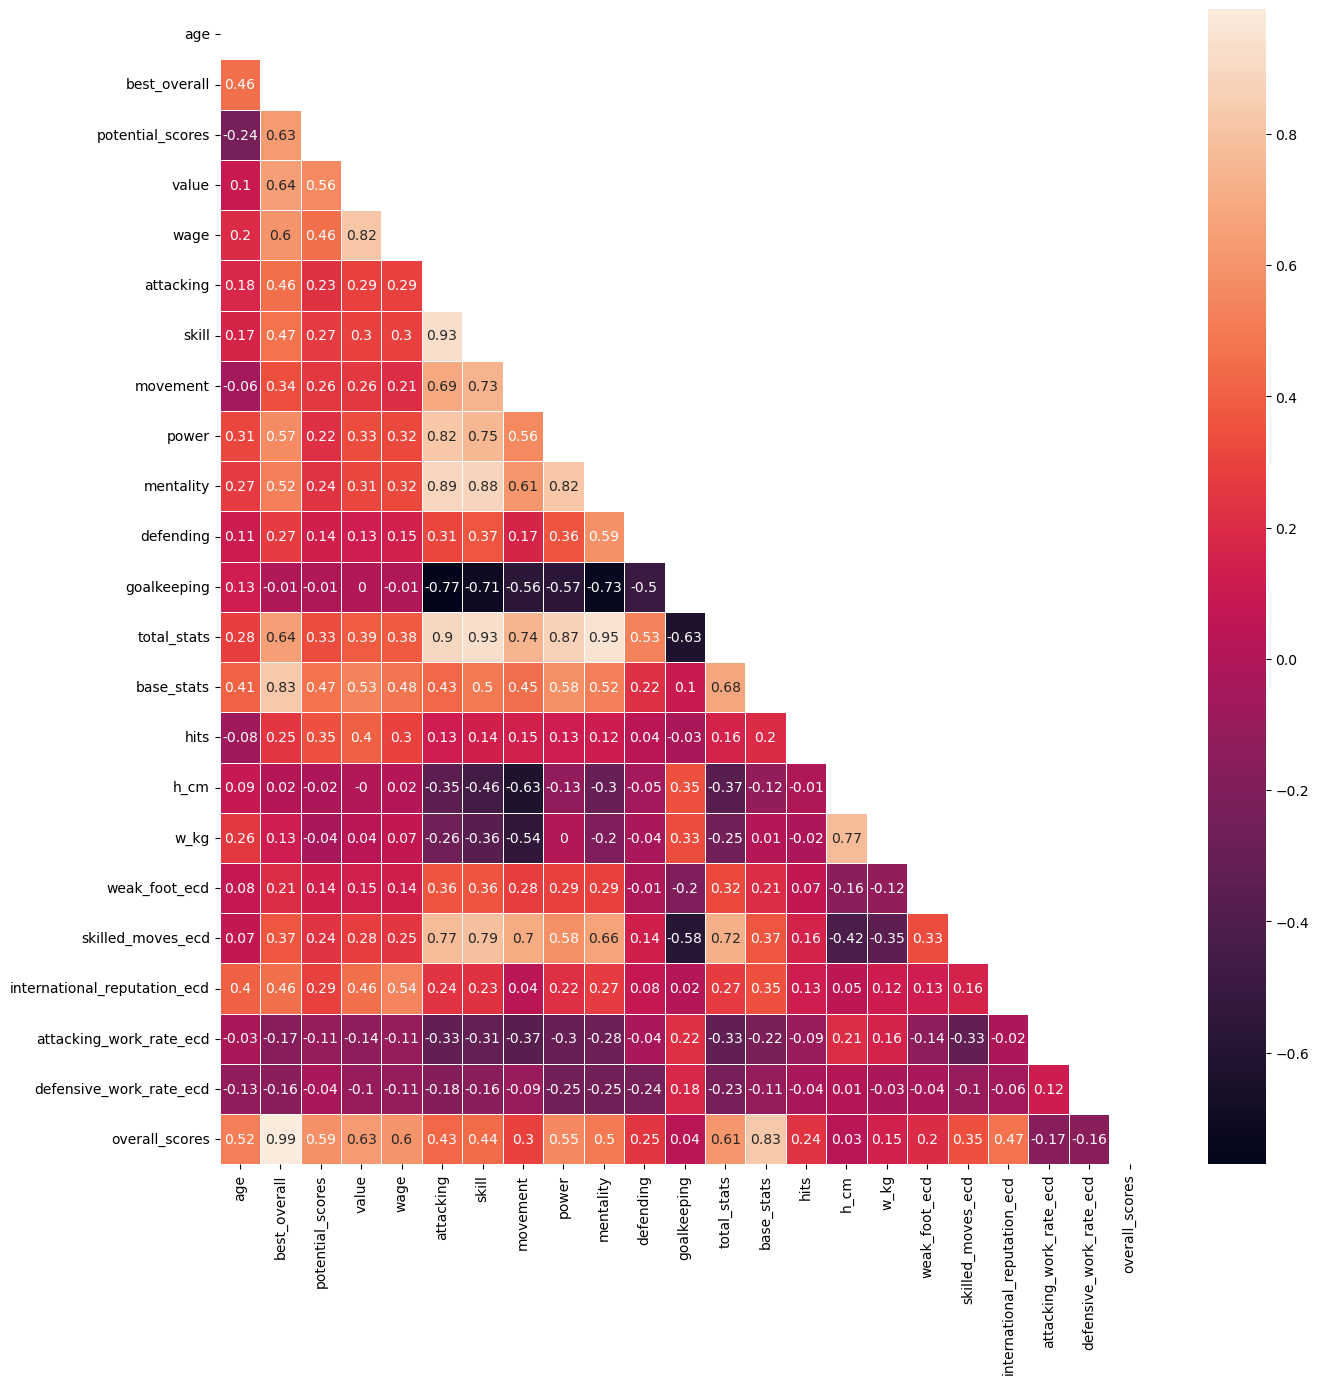

In [39]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(X_N_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(X_N_corr, mask=mask, annot=True, linewidths=.5, ax=ax)
plt.show()

* In another attempted we did we dropped `bov` and `pas` columns because our target was `value`. Which, at the end, was not feeling right to predict the best next player.
* So, for this dataset, after checking the correlation between variables we do not detect any multicollinearity, so we proceed to normalize the data.

### Normalizing the Data

### X-Y Split

In [40]:
##X_Y SPLIT BEFORE normalizing. ~ Xisca. We don't want to normalize the target
Y = X_N['overall_scores']### X-Y Split
X_N = X_N.drop(['overall_scores'], axis=1)

In [41]:
transformer = MinMaxScaler().fit(X_N) # rescale the Data into 0,1 for our model
X_N_minmax = transformer.transform(X_N) 

In [42]:
# create new data frame using data from 'X_N_minmax'
X_N_normalized = pd.DataFrame(X_N_minmax, columns = X_N.columns)
X_N_normalized.sample(3) 

,age,best_overall,potential_scores,value,wage,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,hits,h_cm,w_kg,weak_foot_ecd,skilled_moves_ecd,international_reputation_ecd,attacking_work_rate_ecd,defensive_work_rate_ecd
2177,0.297297,0.490196,0.437500,0.009005,0.005357,0.596535,0.651054,0.766382,0.702532,0.695418,0.486275,0.108046,0.692114,0.562963,0.000217,0.35,0.270723,0.5,0.5,0.0,0.666667,0.666667
8348,0.108108,0.352941,0.520833,0.004265,0.003571,0.571782,0.433255,0.675214,0.534810,0.479784,0.125490,0.105747,0.464353,0.337037,0.000000,0.55,0.300729,0.5,0.5,0.0,0.000000,0.666667
12303,0.243243,0.137255,0.125000,0.000237,0.000000,0.066832,0.053864,0.025641,0.120253,0.064690,0.078431,0.558621,0.026498,0.148148,0.000000,0.75,0.631631,0.0,0.0,0.0,0.666667,0.666667


Красивый!
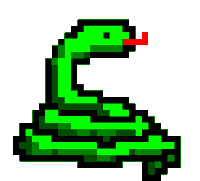

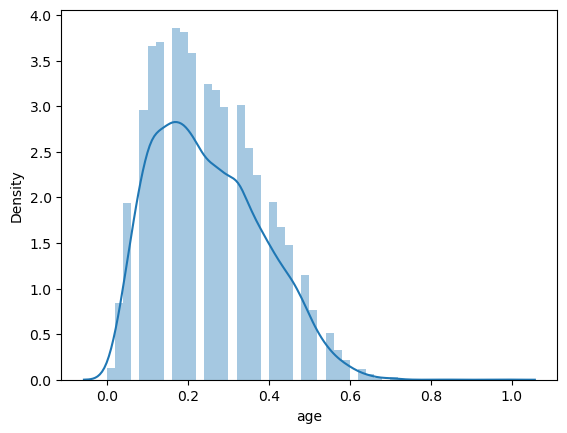

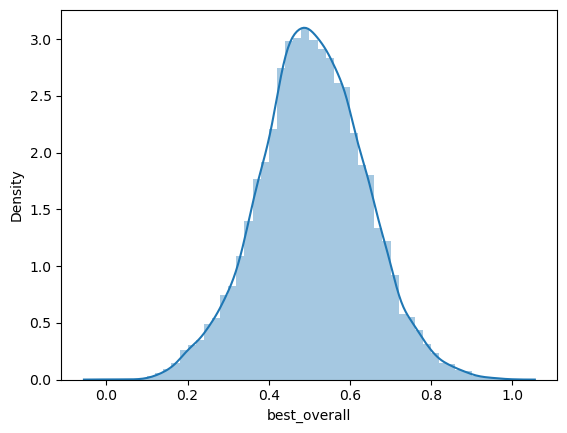

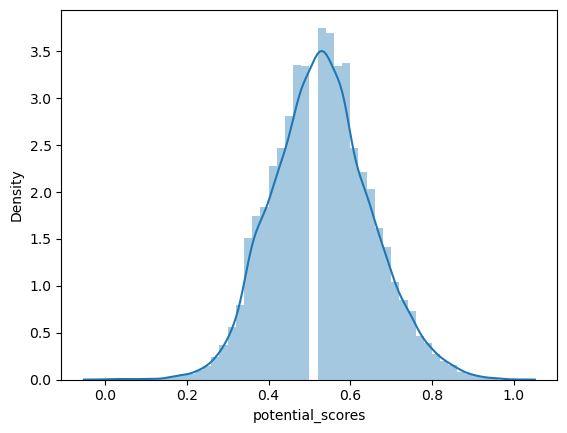

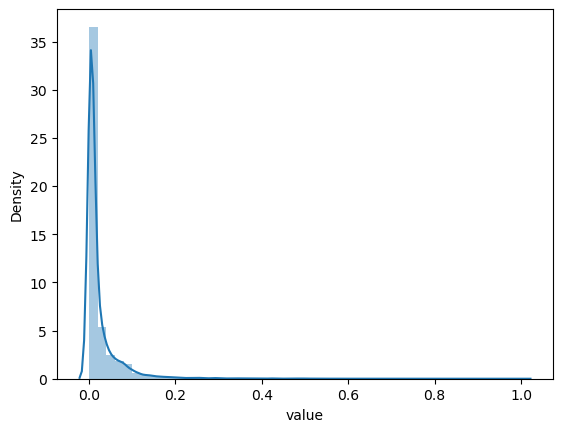

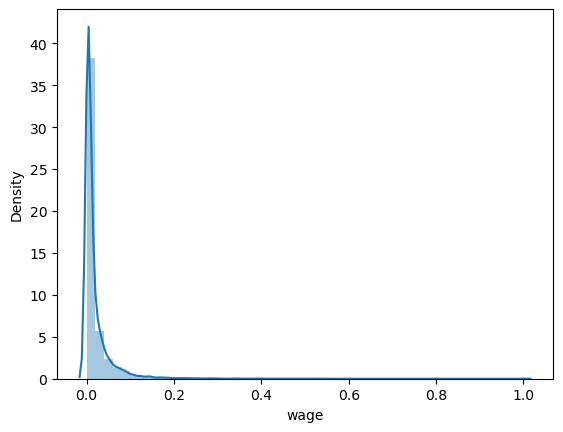

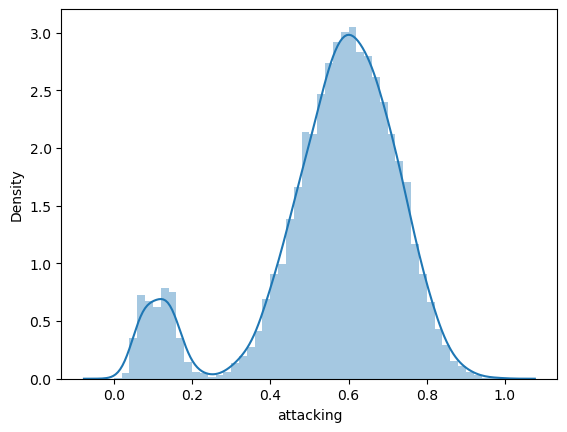

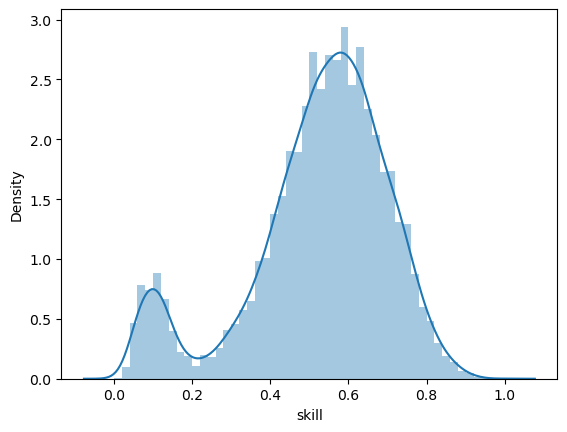

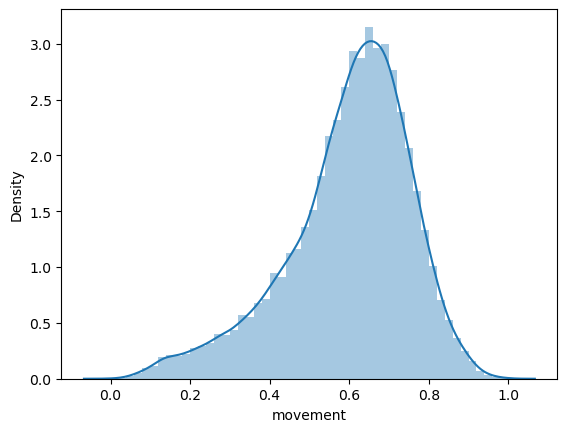

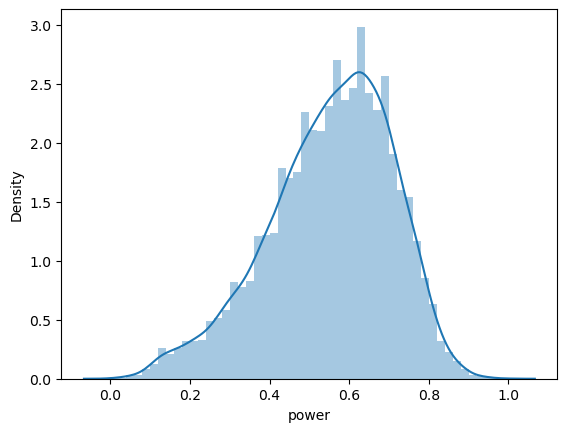

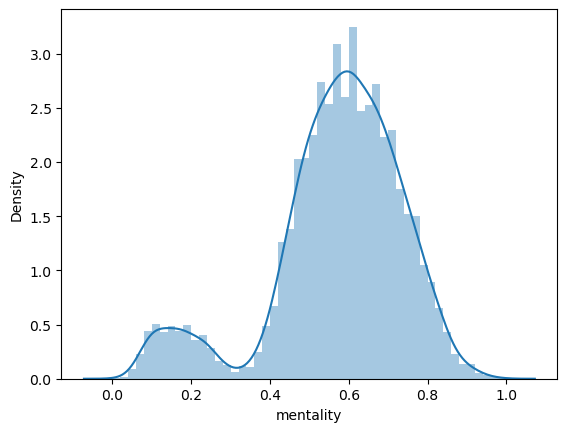

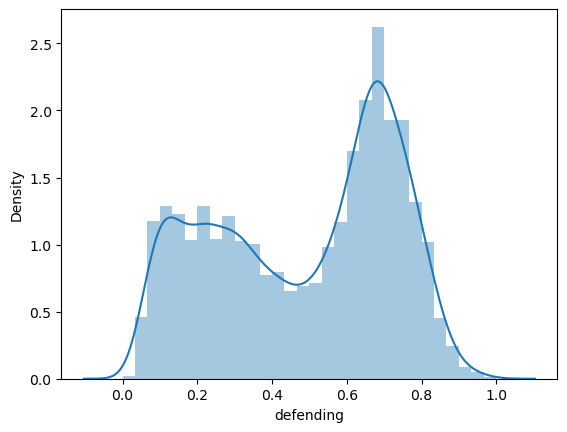

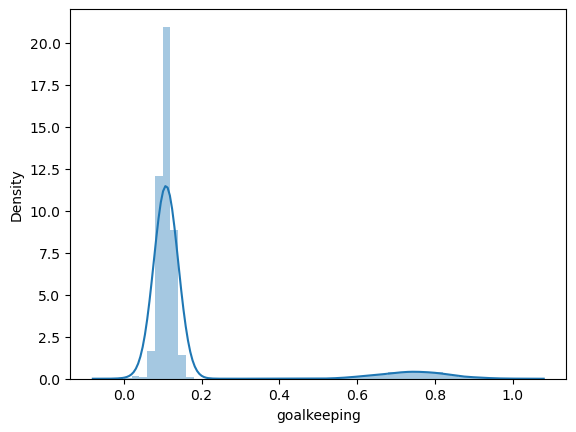

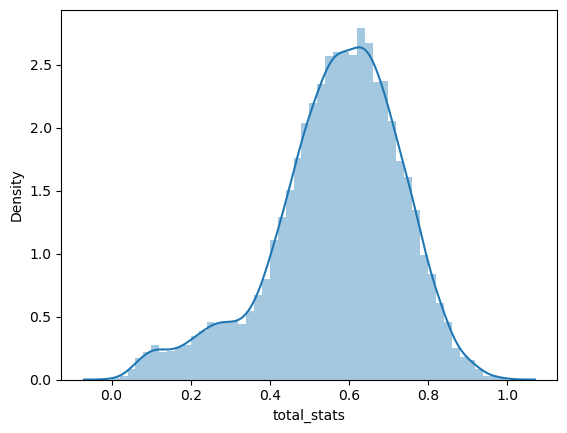

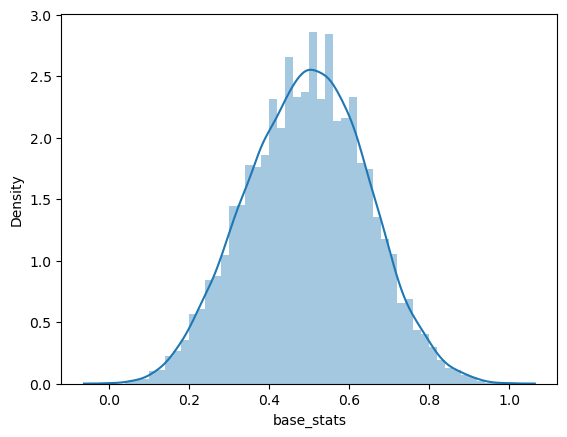

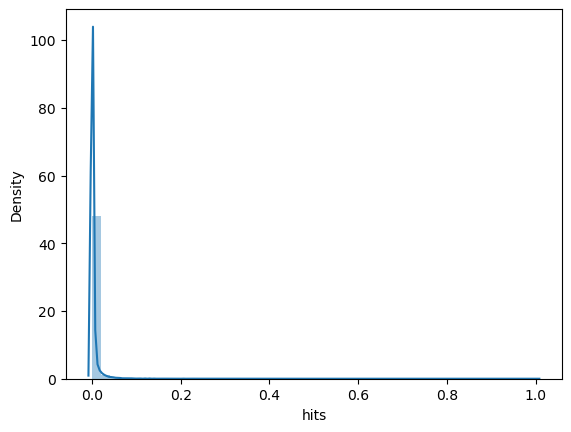

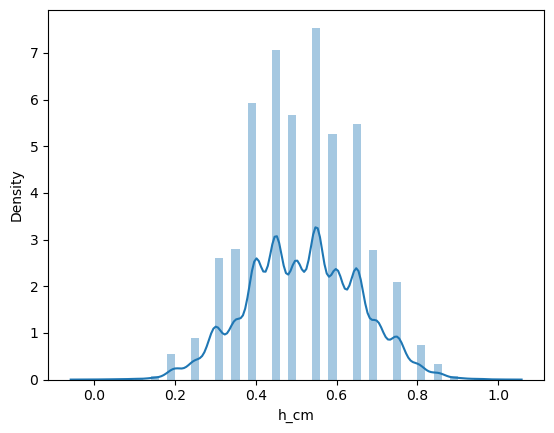

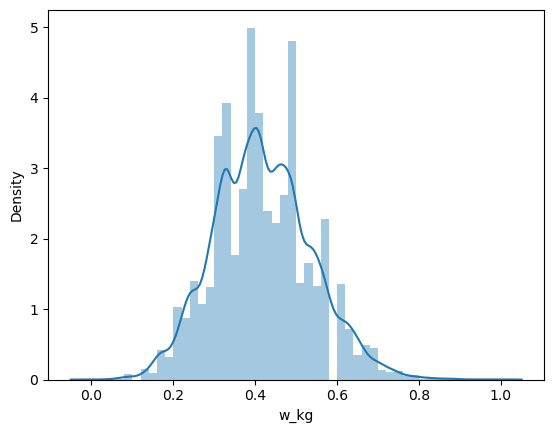

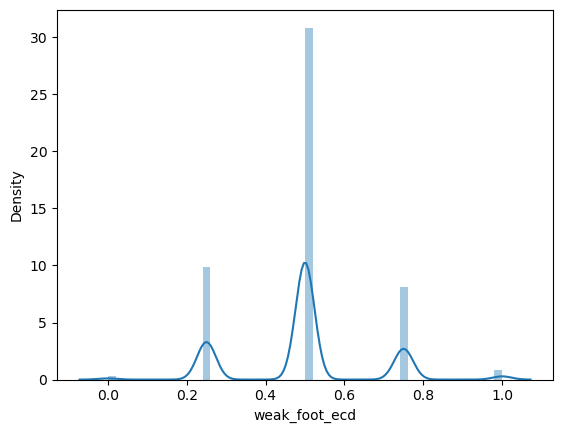

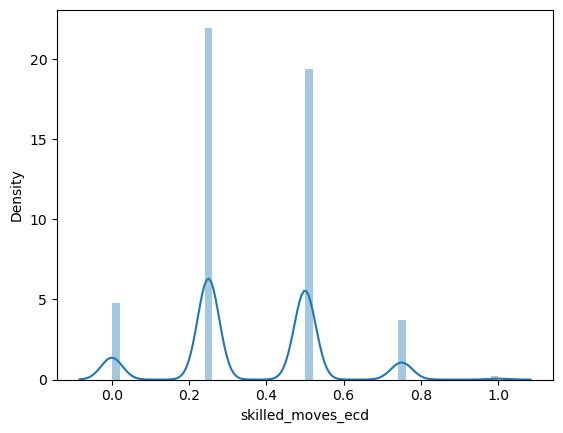

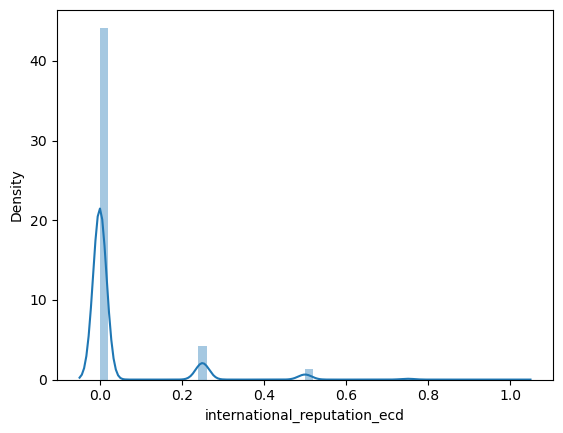

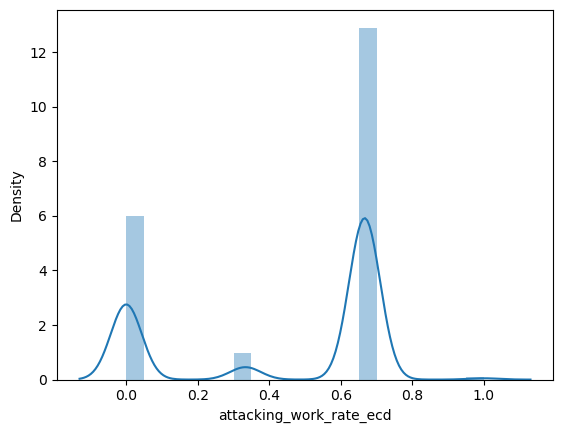

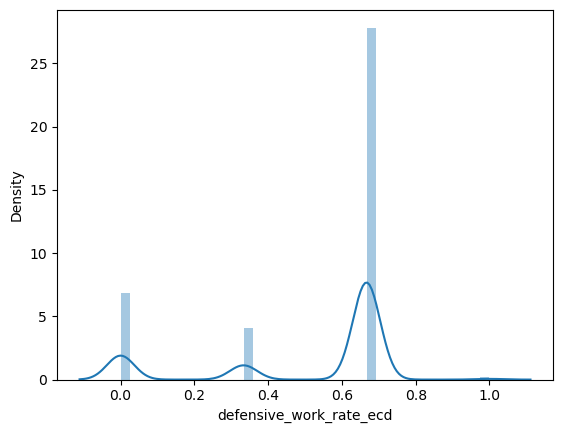

In [43]:
for i in X_N_normalized:
    sns.distplot(X_N_normalized[i])
    plt.show()

## 05 - Modeling

### Train-Test Split

In [44]:
# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X_N, Y, test_size=0.3, random_state=42) 
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [45]:
len(X_N)*0.7 # Len before the test

11987.5

In [46]:
len(X_test) # Len after the test

5138

In [47]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

## 06 - Model Validation

In [48]:
predictions = model.predict(X_test)

In [49]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.9803855414655414, 0.9587213732027325, 0.9191466714357331)

In [50]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  0.9803855414655414
RMSE =  0.9587213732027325
The value of the metric MSE is  0.9191466714357331
MAE =  0.7269314203992508


### Present results

In [70]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
15195,59,58.399851,0.600149
14193,65,65.643172,0.643172
16722,62,60.688146,1.311854
8037,68,66.369853,1.630147
6350,76,77.202656,1.202656
...,...,...,...
7576,61,60.559066,0.440934
2030,77,76.789271,0.210729
11632,65,64.993642,0.006358
39,75,75.207511,0.207511


In [63]:
results.sort_values('diff', ascending=False).head(10)

,true,pred,diff
3834,61,68.087589,7.087589
4779,64,68.807261,4.807261
4423,55,59.753102,4.753102
995,55,59.553403,4.553403
446,58,62.438895,4.438895
273,58,62.283489,4.283489
1199,65,69.243915,4.243915
1477,59,63.210813,4.210813
1853,57,61.168499,4.168499
3440,67,71.002214,4.002214


<AxesSubplot:xlabel='true', ylabel='pred'>

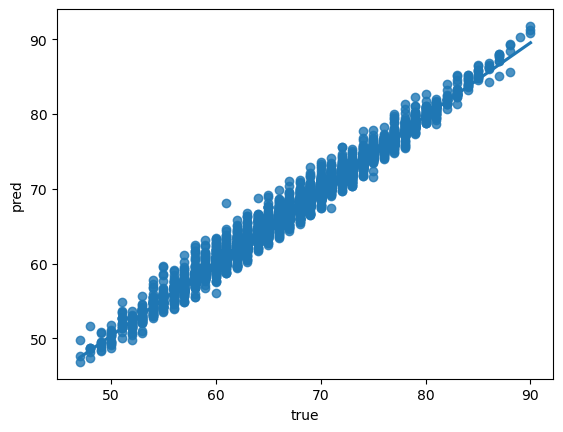

In [64]:
sns.regplot(results['true'], results['pred'])

In [65]:
# What do we do with the result?
# Do we want to predict the OVA a player?
# How can we detect a talent with that model?

## 07 - Reporting

In [55]:
X_N.iloc[[2358]]

,age,best_overall,potential_scores,value,wage,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,hits,h_cm,w_kg,weak_foot_ecd,skilled_moves_ecd,international_reputation_ecd,attacking_work_rate_ecd,defensive_work_rate_ecd
2358,29,76,76,6500000.0,51000.0,258,248,341,303,264,224,54,1692,368,14,182.88,78.93,3,2,1,1,0


In [56]:
X_N.iloc[[2358]]

,age,best_overall,potential_scores,value,wage,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,hits,h_cm,w_kg,weak_foot_ecd,skilled_moves_ecd,international_reputation_ecd,attacking_work_rate_ecd,defensive_work_rate_ecd
2358,29,76,76,6500000.0,51000.0,258,248,341,303,264,224,54,1692,368,14,182.88,78.93,3,2,1,1,0


In [57]:
results.iloc[[2358]]

,true,pred,diff
10826,70,69.731764,0.268236


In [71]:
# Creating a new 
names = data_copy.loc[results.index.to_list(), ["id","name"]]
names

,id,name
15195,252942,G. Borrelli
14193,248174,N. Boujellab
16722,257995,A. Wahab Ibrahim
8037,226077,A. Gabr
6350,216054,N. Domínguez
...,...,...
7576,224132,D. Gómez
2030,185195,O. Ighalo
11632,240212,D. Petković
39,1845,O. Solskjær


In [73]:
# Merge the the results with 
test = pd.concat([names, results], axis=1)
test

,id,name,true,pred,diff
15195,252942,G. Borrelli,59,58.399851,0.600149
14193,248174,N. Boujellab,65,65.643172,0.643172
16722,257995,A. Wahab Ibrahim,62,60.688146,1.311854
8037,226077,A. Gabr,68,66.369853,1.630147
6350,216054,N. Domínguez,76,77.202656,1.202656
...,...,...,...,...,...
7576,224132,D. Gómez,61,60.559066,0.440934
2030,185195,O. Ighalo,77,76.789271,0.210729
11632,240212,D. Petković,65,64.993642,0.006358
39,1845,O. Solskjær,75,75.207511,0.207511


In [74]:
test[test.name=='R. Richards']

,id,name,true,pred,diff
16660,257793,R. Richards,54,53.977356,0.022644


In [75]:
data_copy[data_copy.name=='R. Richards']

,id,name,age,overall_scores,nationality,club,best_overall,bp,position,player_photo,club_logo,flag_photo,potential_scores,team&contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,weak_foot,skilled_moves,attacking_work_rate,defensive_work_rate,international_reputation,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,rel_clause,h_cm,w_kg,weak_foot_ecd,skilled_moves_ecd,international_reputation_ecd,attacking_work_rate_ecd,defensive_work_rate_ecd,pot_minus_ova
13620,246273,R. Richards,18,59,England,Tottenham Hotspur,60,ST,ST RM LM,https://cdn.sofifa.com/players/246/273/20_120.png,https://cdn.sofifa.com/teams/18/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,75,Tottenham Hotspur 2017 ~ 2020,"5'9""",165lbs,Right,16,"Jul 1, 2017",325000.0,5000.0,€821K,2017 ~ 2020,258,42,62,48,52,54.0,256,59,61.0,39,44,53,330,74,78,52.0,54,72.0,284,63,56.0,56,54,55,240,39,20.0,56.0,61.0,64,51.0,59,17,22,20.0,56,11,14,10,11,10,1483,318,4 ★,3★,Medium,Medium,1 ★,76,60,50,57,23,52,9,58+2,58+2,58+2,58+0,59+0,59+0,59+0,58+0,57+2,57+2,57+2,57+2,51+2,51+2,51+2,57+2,42+2,39+2,39+2,39+2,42+2,40+2,34+2,34+2,34+2,40+2,16+2,Male,821000.0,175.26,74.843509,4,3,1,2,2,16
16660,257793,R. Richards,16,54,England,West Bromwich Albion,55,LM,LM CAM,https://cdn.sofifa.com/players/257/793/20_120.png,https://cdn.sofifa.com/teams/109/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,80,West Bromwich Albion 2020 ~ 2023,"5'10""",150lbs,Left,26,"Aug 4, 2020",150000.0,1000.0,€450K,2020 ~ 2023,220,52,40,37,50,41.0,248,59,47.0,41,43,58,313,72,64,62.0,43,72.0,251,53,51.0,54,45,48,194,33,16.0,39.0,55.0,51,48.0,84,22,29,33.0,43,10,8,8,8,9,1353,293,3 ★,2★,Medium,Medium,1 ★,68,45,50,59,26,45,83,48+2,48+2,48+2,53+0,51+0,51+0,51+0,53+0,52+2,52+2,52+2,53+2,47+2,47+2,47+2,53+2,43+2,38+2,38+2,38+2,43+2,41+2,34+2,34+2,34+2,41+2,12+2,Male,450000.0,177.80,68.039554,3,2,1,2,2,26
